## Rate equations

The **rate law** or **rate equation** for a chemical reaction is an equation that links the *initial* or *forward reaction rate* with the *concentrations* or *pressures* of the reactants and constant parameters (normally rate coefficients and partial reaction orders).

The **kinematic theory** studies how the reactants and products of a chemical reaction appear/disappear in terms of their velocity.

To this purpose we need to model (under reasonable assumptions) the chemical reactions using (a set of) differential equations.

The first law of the kinematic theory is called **law of mass action** (LAM): this law is based on the assumption that a large number of small particles (with an individual random kinematic motion) could be bring back to a "low resolution" model.

In particular, the LAM states that the **velocity** of a chemical reaction is *proportional* to the concentration of the reactants and products, i.e

$$
\alpha A + \beta B \cdots \rightleftharpoons \cdots \sigma S + \theta T
$$

where $\alpha, \beta, \cdots$ are the numbers of molecules of types $A, B, \cdots$.

Using the symbol $[]$ to identify the **chemical concentration** of each species, using the LAM we can determine the set of **constants** which regulates the appearence/disappearence of the concetrantions

$$
k_+ [A]^\alpha [B]^\beta = \mbox{rate of (appearence) reactants}
$$
$$
k_- [S]^\sigma [T]^\tau = \mbox{rate of (disappearence) products}
$$


Using these reaction rates we can define the **equilibrium constant** of the reaction as

$$
K = \frac{k_+}{k_-} = \frac{[S]^\sigma [T]^\tau \cdots}{[A]^\alpha [B]^\beta \cdots}
$$

**Note:** This law is valid **only** if the number of particles/molecules are large enough ($\equiv N_A$), since it based on the assumption of homogeneous concentrations (it derives from a physical-statistical description of the system).

We can broadly divide the physycal-statistical chemical reactions into two categories:

* **reversible**

$$
A + A + B \rightarrow A_2 B \quad \Rightarrow \quad \frac{d[A_2B]}{dt} = k [A]^2 [B]
$$

* **irreversible**

$$
A + A + B \rightarrow C + D \quad \Rightarrow \quad \frac{d[C]}{dt} = k_{AB} [A]^2 [B] - k_{CD} [C][D]
$$

## Zero Order kinetic

Zero-order reaction is the simplest case.

For zero-order reactions, the reaction rate is **independent** of the concentration of a reactant, so that changing its concentration has no effect on the speed of the reaction. 

Thus, the concentration changes *linearly* with time. 
This may occur when there is a bottleneck which limits the number of reactant molecules that can react at the same time, for example if the reaction requires contact with an enzyme or a catalytic surface.

$$
R \xrightarrow[]{k} P \quad \Rightarrow \quad v = \frac{d[A]}{dt} = -k
$$

The reaction above is an **irreversible** reaction and since there is not dependency on the concentrations we can conclude that the appearence rate of the product $P$ is equal to the disappearence rate of the reactant $R$, i.e all the reactant becomes product or (mathematically)

$$
\frac{d[R]}{dt} = - \frac{d[P]}{dt} = -k
$$

integrating this equation we obtain the solution

$$
P(t) = P_0 + k \cdot t
$$

which a motion at **constant velocity** (a *linear system*) in which the concentration of the product increases linearly with the time.

> Many enzyme-catalyzed reactions are zero order, provided that the reactant concentration is much greater than the enzyme concentration which controls the rate, so that the enzyme is saturated. 

> For example, the biological oxidation of ethanol to acetaldehyde by the enzyme liver alcohol dehydrogenase (LADH) is zero order in ethanol.

Let's try to implement the above consideration into a Python code.

First of all we have to define our differential equation as a classical function of Python.

>⚠️**Note:** A differential equation is essentially a derivative function.
Since we are working into a discrete system (PC) we have to re-think the equation into its discrete form, using the formal definition

$$
f'(x) = \lim_{\Delta x \rightarrow 0}\frac{\Delta y}{\Delta x} = \lim_{\Delta x \rightarrow 0}\frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

In [1]:
import numpy as np

def zero_order (x : np.ndarray, y0 : float, alpha : float) -> np.ndarray:
    '''
    Zero order kinetic
    
    Parameters
    ----------
        x : array-like
            List of time points
        
        y0 : float
            Initial condition of the reactant
        
        alpha : float
            Constant of the reaction
    
    Returns
    -------
        y : array-like
            The resulting product array    
    '''
    # determine the interval as diff
    dx = x[1] - x[0] # Note: we are assuming it is constant!!
    
    # Create an empty buffer to store our results
    # Its length must be greater than x since we want to set
    # the initial condition!
    y = np.empty(shape=(len(x) + 1, ), dtype=float)
    # Set the initial condition
    y[0] = y0
    
    # Integrate the equation using the Euler method
    for i, _ in enumerate(x):
        y[i + 1] = y[i] * (1. - alpha * dx)

    return y[:-1] # skip the latest point

Now we can set a series of initial parameter and use them to simulate our model.

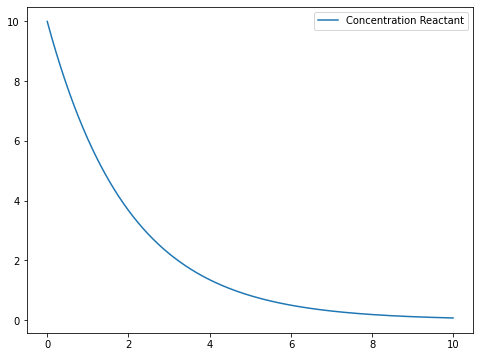

In [2]:
import pylab as plt

# initial conditions
y0 = 10
alpha = .5
iterations = 1000
dt = 1e-2

x = np.arange(0, iterations*dt, dt)
R = zero_order(x, y0, alpha)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(x, R, label='Concentration Reactant')
ax.set_xlabel('Time', fontsize=24)
ax.set_ylabel('Concentration', fontsize=24)
ax.legend()

 #### Extra - C++ version

 For sake of completeness we implement the same functions also in C++.
 
 >⚠️**Note:** C++ is always **faster** than Python but more complex to write!
 > Furthermore, it is not straightforward the visualization of the results: if you are interested into a graphic library (please do not spend a lot of time to re-implement the same things!) you can use [GnuPlot](http://www.gnuplot.info/), [OpenCV](https://docs.opencv.org/3.4/d0/d1e/classcv_1_1plot_1_1Plot2d.html), or the easier [cv-plot](https://github.com/Profactor/cv-plot) libraries.

```c++
// g++ zero_order_kinetic.cpp -std=c++14 -O3 -o zero_order_kinetic

#include <memory>
#include <algorithm>
#include <type_traits>

// just to be sure that the given value is a floating point one...
template < class type >
using is_floating_point = typename std :: enable_if < std :: is_floating_point < type > :: value > :: type *;

template < class type, is_floating_point < type > = nullptr >
using array = std :: unique_ptr < type[] >;
 
/**
* @brief Zero order kinetic
*
* @param x List of time points.
* @param y0 Initial condition of the reactant.
* @param alpha Constant of the reaction.
*
* @tparam type Data-type of arrays
* @tparam Length of time points.
*
* @return The resulting product array.
*
*/
template < class type, int32_t N >
array < type > zero_order (const array < type > & x, const type & y0, const type & alpha)
{
  // determine the interval as diff
  const type dx = x[1] - x[0]; // Note: we are assuming it is constant!!
  
  // Create an empty buffer to store our results
  array < type > y = std :: make_unique < type[] >(N);
  // Set the initial condition
  y[0] = y0;
  
  // Integrate the equation using the Euler method
  for (int32_t i = 0; i < N - 1; ++i)
    y[i + 1] = y[i] * (type(1.) - alpha * dx);
    
  return y;
}


int32_t main (/*int32_t argc, char ** argv*/)
{
  const float y0 = 10.f;
  const float alpha = 0.5f;
  
  const int32_t iterations = 1000;
  const float dt = 1e-2f;
  
  array < float > x(new float[iterations]);
  std :: generate_n(x.get(), iterations, [n = 0, dt] () mutable { return dt * n++; });
  
  array < float > R = zero_order < float, iterations >(x, y0, alpha);

  return 0;
}

```

## 1st Order kinetic

A first order reaction depends on the concentration of only one reactant (a unimolecular reaction, i.e a reactant with a concentration exponent equal to 1). 

Other reactants can be present, but each will be zero order. 

The rate law for such a reaction is 

$$
\frac{d[R]}{dt} = -\frac{d[P]}{dt} = -k[R]
$$

The solution of this differential equation is immediately given by

$$
R(t) = R_0 e^{(-k\cdot t)}
$$

i.e an exponential disappearance of the reactant.

From this equation we can easily extract the concentration of the product along the time considering that the **total concentration** must be **costant**, i.e

$$
[R + P] = [R] + [P]
$$

aka <span style="color:blue">*omnia mutantur, nihil interit*</span>

>⚠️**Note:** The two equations are not independent but one is the "opposite" of the other and thus there must be a conservation law!

Substituing the total concentration equation we have a system with 2 equations with 2 unknowns, from which we can determine the kinematic of the product concentration as

$$
P(t) = \text{Tot} - R(t) = \text{Tot} + (P_0 - \text{Tot}) \cdot e^{-k \cdot t}
$$

which is a (positive) exponential behavior.

> **Note:** When $P_0 = 0$ the above equation lead to $P(t) = \text{Tot} \cdot (1 - e^{-k\cdot t})$ which represents a positive exponential growth.

A classical example of first order kinetic is the **inter-conversion** system (aka **reversible reaction**)

$$
R \rightleftharpoons P
$$

which lead to this couple of equations

$$
\frac{d[R]}{dt} = -k_f \cdot [R] + k_b \cdot [P]
$$
$$
\frac{d[P]}{dt} = k_f \cdot [R] - k_b \cdot [P]
$$

where $k_f$ and $k_b$ represent the two constants of the reaction, *forward* and *backward* respectively.

Let's try to implement these couple of equations in Python.

We will use the same considerations proposed in the previous case, but in now we have to manage two equations (two arrays) at the same time.

In [3]:
from scipy.integrate import odeint

def conversion (y : tuple, t : np.ndarray, 
                kf : float, kb : float):
    '''
    1st order kinetic
    
    Conversion equation
    
    Parameters
    ----------
        y : tuple
            Couple of product-reagents arrays
        
        t : array-like
            List of time points
        
        kf : float
            Forward constant
        
        kb : float
            Backward constant
    
    Results
    -------
        delta : tuple
            Next point of product-reagents arrays
    '''

    product, reagents = y
    dp =  kf * reagents - kb * product
    dr = -kf * reagents + kb * product

    return (dp, dr)

In this case we will use the pre-built function provided by the `scipy` package for an accurate integration of these equations.

The required arguments are:
* the integration step function
* the initial condition
* the time array
* the model parameters

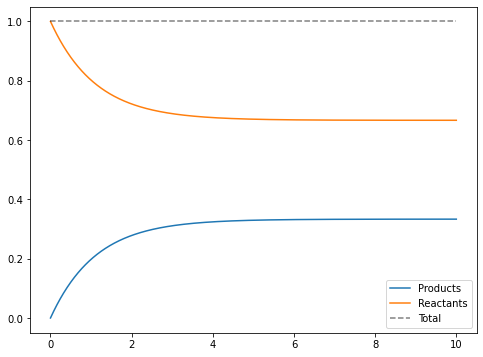

In [4]:
# initial conditions
y0 = (0, 1.)
kf, kb = (.3, .6)

time = np.linspace(0, 10, 1000)
res = odeint(conversion, y0, time, args=(kf, kb))
total = np.sum(res, axis=1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(time, res[:, 0], label='Products')
ax.plot(time, res[:, 1], label='Reactants')
ax.plot(time, total, 'k--', label='Total', alpha=.5)
ax.set_xlabel('Time', fontsize=24)
ax.set_ylabel('Concentration', fontsize=24)
ax.legend()

This plot well highlights one of the main characteristics of the reversible reactions: in these reactions the combination of products and reactants does not go to a completement *but* it goes to an **equilibrium**.

From a kinetic point-of-view this behavior explains the coexistance of two elementary reactions (forward and backward) completely independent.

For this reason the reaction is also called as **inter-conversion**, i.e the total velocity is given by the difference of the velocities of the two reactions.

Thus, given the following **inter-conversion** equation

$$
A + B \underset{k_b}{\stackrel{k_f}{\rightleftharpoons}} C
$$

The velocities of the two reactions can be extimated as

$$
v_1 = -\frac{d[A]}{dt} = - \frac{d[B]}{dt} = k_f [A][B]
$$
$$
v_2 = -\frac{d[C]}{dt} = k_b [C]
$$

and the total velocity is given by

$$
v_{\text{Tot}} = k_f [A][B] - k_b [C]
$$

In this situation we can define a **stationary state** when the two reaction rates will be equal

$$
k_f [A][B] = k_b [C] \quad \Rightarrow \quad k_c = \frac{k_f}{k_b}
$$

and the time required to reach this state will be given by

$$
\tau = \frac{1}{k_f + k_b}
$$

from which is estimated the classification between *fast* and *slow* reactions.

> **Example:** An example of this kind of reaction is given by the photoreceptor cells of the retina which transform the (input) light signals into (output) elettrica signals.
In the biological field, an incoming signal transformed into another type of signal is modelled by a pluri-molecular kinetic reaction.

> **Example:** A second example is given by the immunoglobulins (antibodies) of the immune system.
The immune system is an ensemble of cells which produce proteins (immunoglobulins) and lymphocytes at the presence of antigen.
The antibodies are exposed on the surface of the cells as receptors, aka "controllers" who check the adherence of extern antigen: when the antigen is combined with the receptor an immunitary response is made.
In these terms we can model the bi-molecular kinetic reaction of the receptor (A) and the antigen (B) with these equations.

  #### Extra - C++ version

As before, we propose the C++ counterpart of the same code.

>⚠️**Note:** Unfortunately, C++ does not have a ready-to-use function for differential equation integration.
> Thus, we need to integrate the 1st order kinetic equation by-hand.

```c++
// g++ fist_order_kinetic.cpp -std=c++14 -O3 -o fist_order_kinetic

#include <memory>
#include <algorithm>
#include <type_traits>
#include <cassert>

template < class type >
using is_floating_point = typename std :: enable_if < std :: is_floating_point < type > :: value > :: type *;

template < class type, is_floating_point < type > = nullptr >
using array = std :: unique_ptr < type[] >;

/**
* @brief 1st order kinetic
*
* @param x List of time points.
* @param p0 Initial condition of the product.
* @param r0 Initial condition of the reagent.
* @param kf Constant of the forward reaction.
* @param kb Constant of the backward reaction.
* @param P The resulting product array.
* @param R The resulting reagent array.
*
* @tparam type Data-type of arrays
* @tparam Length of time points.
*
*/
template < class type, int32_t N >
void first_order (const array < type > & x, const type & p0, const type & r0,
                  const type & kf, const type & kb,
                  array < type > & P, array < type > & R
                 )
{
  // determine the interval as diff
  const type dx = x[1] - x[0]; // Note: we are assuming it is constant!!

  // Set the initial condition
  P[0] = p0;
  R[0] = r0;

  // Integrate the equation using the Euler method
  for (int32_t i = 0; i < N - 1; ++i)
  {
    P[i + 1] = P[i] + ( kf * R[i] - kb * P[i]) * dx;
    R[i + 1] = R[i] + (-kf * R[i] + kb * P[i]) * dx;
  }
}

int32_t main (/*int32_t argc, char ** argv*/)
{
  const float p0 = 0.f;
  const float r0 = 1.f;
  const float kf = 0.3f;
  const float kb = 0.6f;

  const int32_t iterations = 1000;
  const float dt = 1e-2f;

  array < float > time(new float[iterations]);
  std :: generate_n(time.get(), iterations, [n = 0, dt] () mutable { return dt * n++; });

  array < float > resulting_product(new float[iterations]);
  array < float > resulting_reagent(new float[iterations]);
  array < float > resulting_total(new float[iterations]);

  first_order < float, iterations >(time, p0, r0, kf, kb, resulting_product, resulting_reagent);

  std :: transform (resulting_product.get(), resulting_product.get() + iterations + 1,
                    resulting_reagent.get(),
                    resulting_total.get(), std :: plus < float >());

  // consistency check -> total concentration must be costant and equal to 1. (less than numerical precision!)
  assert (std :: all_of(resulting_total.get(), resulting_total.get() + iterations,
                        [] (const float & tot) { return std :: abs(tot - 1.) < 1e-5f; }));

  return 0;
}

```

## Michaelis Menten

The Michaelis-Menten (MM) kinetic describes the rate of a chemical reaction catalized by enzymes, varying its concentration and the concentration of the substrate.

In biochemistry, Michaelis–Menten kinetics is one of the best-known models of enzyme kinetics.

It is named after German biochemist Leonor Michaelis and Canadian physician Maud Menten.

>**Def:** Catalysis is the process of increasing the rate of a chemical reaction by adding a substance known as a catalyst.
Catalysts are not consumed in the catalyzed reaction but can act repeatedly.

>**Def:** Enzymes are proteins that act as biological catalysts (biocatalysts). 
Catalysts accelerate chemical reactions. 
The molecules upon which enzymes may act are called substrates, and the enzyme converts the substrates into different molecules known as products. 

The MM kinetic is model as

$$
E + S \underset{k_b}{\stackrel{k_f}{\rightleftharpoons}} ES \xrightarrow[]{k_c} E + P
$$

where $k_c$ is the **catalytic constant** which regulates the rate of the enzymatic reaction.

The link between enzyme and substrate allows to reach the activation energy of the (*irreversible*) reaction.

The enzyme is highly specific for its substrate and their link is called **lock and key** mechanism.
This mechanism allows the union between enzymes and substrates non properly associated, leading to a consequent loss in the reaction efficiency.
In this way we can associate to each enzyme an affinity distribution with its substrates.

Using the **action mass law** we can re-write the MM kinetic model with the following set of differential equations

$$
\begin{cases}
    \frac{d[E]}{dt}  = -k_f[E][S] + k_b[ES] + k_c[ES] \\
    \frac{d[S]}{dt}  = -k_f[E][S] + k_b[ES]           \\
    \frac{d[ES]}{dt} =  k_f[E][S] - k_b[ES] - k_c[ES] \\
    \frac{d[P]}{dt}  =  k_c[ES]                       
\end{cases}
$$

>⚠️**Note:** The 2nd equation is exactly the opposite of the 1st one.
> This imposes the conservation of enzyme concentration!

>⚠️**Note:** The 4th equation is a typical 1st order irreversible reaction.

The solution of this system of equations can be obtained using the *Stationary State approximation*, i.e

* The 1st equation is redundant, since the kinetic imposes the conservation of the enzyme concentration

$$
[E]_{tot} = [E] + [ES] \rightarrow [E] = [E]_{tot} - [ES]
$$

* The approximation of (pseudo) Stationary State assumes as constant the concetration of $[ES]$, i.e more is created and more is consumed

$$
\frac{d[ES]}{dt} = 0 \rightarrow [ES] = \frac{k_f}{k_b + k_c}[E][S]
$$

* Therefore, we can define a reaction constant given by the combination of $k_f$, $k_b$, and $k_c$, i.e

$$
k_m = \frac{k_b + b_c}{kf}
$$

called **Michaelis-Menten constant**.

By substitution in the previous formula, we obtain

$$
[ES] = \frac{1}{k_m}[S]([E]_{tot} - [ES]) = \frac{[E]_{tot} [S]}{k_m + [S]}
$$

>⚠️**Note:** The approximation of stationary state is considered *pseudo* since in the final result remains the dependency by $[S]$.
> This approximation can be rethought as a very slow reaction process.

Now we can define the velocity of the product reaction as

$$
v_p = \frac{d[P]}{dt} = - \frac{d[S]}{dt} = \frac{k_c [E]_{tot} [S]}{k_m + [S]}
$$

since in an *ideal* kinetic the substrate is consumed as much as the product is created.

It is interesting to notice that *if* $[S] = k_m$ we are at the half of the maximum velocity of the reaction: in this way we can think about $k_m$ as the *affinity degree* between substrate and enzyme.

If $[S]\rightarrow\infty$ we achieve the asymptotic value of the reaction velocity: it corresponds to the condition in which there are more substrate than necessary and therefore the reaction is as fast as possible.

$$
v_p = \frac{v_{MAX} [S]}{k_m + [S]}
$$

where $v_{MAX}$ is the maximum velocity of the product generation.

Now lets try to implement the MM model as Python code.
As before we can easily obtain a simulation of our model using the *odeint* function of *scipy*.

In [19]:
def conversion (y : tuple, t : np.ndarray, 
                kf : float, kb : float, kc : float) -> tuple:
    '''
    Michaelis-Menten conversion
    
    Parameters
    ----------
        y : tuple
            List of [S], [E], [ES], and [P] arrays
            
        t : array-like
            List of time points
        
        kf : float
            Forward constant
        
        kb : float
            Backward constant
        
        kc : float
            Product constant
    
    Returns
    -------
        delta : tuple
            Next point of [S], [E], [ES], and [P] arrays
    '''
    
    S, E, ES, P = y
    d_S  = -kf * S * E + kb * ES
    d_E  = -kf * S * E + kb * ES + kc * ES
    d_ES =  kf * S * E - kb * ES - kc * ES
    d_P  = kc * ES
    return (d_S, d_E, d_ES, d_P)

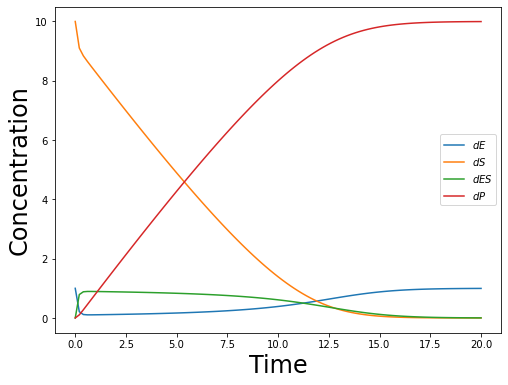

In [20]:
# initial conditions
y0 = (10, 1, 0, 0) # (S0, E0, ES0, P0)
kf, kb, kc = (1., 1e-2, 1.)

time = np.linspace(1e-2, 20, 101)
res = odeint(conversion, y0, time, args=(kf, kb, kc))
dS, dE, dES, dP = zip(*res)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(time, dE, label='$dE$')
ax.plot(time, dS, label='$dS$')
ax.plot(time, dES, label='$dES$')
ax.plot(time, dP, label='$dP$')
ax.set_xlabel('Time', fontsize=24)
ax.set_ylabel('Concentration', fontsize=24)
ax.legend()

#### Extra - C++ version

We propose the C++ version of the same model.

In the version proposed above we have used the *odeint* function provided by *scipy*, while in C++ we need to implement the integration by hand.
In all the previous examples we have used the Euler method for the integration of ODEs; in this case we introduce a more advanced technique of ODE integration: the **Runge-Kutta** (RK) method.

The Runge-Kutta method is a mathematical algorithm used to solve systems of ordinary differential equations (ODEs). 
The general form of these equations is as follows:

$$
\dot{x} = f(t, x) \quad \quad x(t_0) = x_0
$$

Where $x$ is either a scalar or vector. 
The 4th order Runge-Kutta method (yes, there is different level of precision of the same method and the RK4 is the most common one in numerical simulation due to its good balance between numerical efficiency and numerical stability) is given by:

$$
x_{i+1} = x_i + (k_1 + 2(k_2 + k_3) + k_4)/6 \quad \quad t_{i+1} = t_i + h
$$

where $h > 0$ is a step size parameter, $i=1, 2, 3, \cdots$ and:

$$
\begin{cases}
    k_1 = f(t_i, x_i)h                               \\
    k_2 = f(t_i + \frac{h}{2}, x_i + \frac{k_1}{2})h \\
    k_3 = f(t_i + \frac{h}{2}, x_i + \frac{k_2}{2})h \\
    k_4 = f(t_i + h, x_i + k_3)h                     \\
\end{cases}
$$

The Runge-Kutta method offers greater accuracy than the method of multiplying each function in the ODEs by a step size parameter and adding the results to the current values in $x$.

In the MM model we have a system of 4 ODEs that we have to integrate simultaneously.
Therefore we need to re-apply the same formalism on each equation.

Lets see how our C++ code (could) appear (ref. previous Euler implementation)

```c++
// g++ michelis_menten_rk4.cpp -std=c++14 -O3 -o michelis_menten_rk4

#include <memory>
#include <algorithm>
#include <cmath>
#include <type_traits>
#include <cassert>

template < class type >
using is_floating_point = typename std :: enable_if < std :: is_floating_point < type > :: value > :: type *;

template < class type, is_floating_point < type > = nullptr >
using array = std :: unique_ptr < type[] >;


/**
* @brief Michaelis Menten kinetic
*
* @param x List of time points.
* @param s0 Initial condition of the substrate.
* @param e0 Initial condition of the enzyme.
* @param es0 Initial condition of the substrate+enzyme.
* @param p0 Initial condition of the product.
* @param kf Constant of the forward reaction.
* @param kb Constant of the backward reaction.
* @param kc Constant of the product reaction.
* @param S The resulting substrate array.
* @param E The resulting enzyme array.
* @param ES The resulting enzyme+substrate array.
* @param P The resulting product array.
*
* @tparam type Data-type of arrays
* @tparam Length of time points.
*
*/
template < class type, int32_t N >
void MichaelisMenten (const array < type > & x,
                      const type & s0, const type & e0, const type & es0, const type & p0,
                      const type & kf, const type & kb, const type &kc,
                      array < type > & S, array < type > & E, array < type > & ES, array < type > & P
                     )
{
  // determine the interval as diff
  const type dx = x[1] - x[0]; // Note: we are assuming it is constant!!

  // Set the initial condition
  S[0] = s0;
  E[0] = e0;
  ES[0] = es0;
  P[0] = p0;

  // set the equation functions
  auto dS = [](const type & S, const type & E, const type & ES,
               const type & kf, const type & kb)
            {
              return -kf * S * E + kb * ES;
            };
  auto dE = [](const type & S, const type & E, const type & ES,
               const type & kf, const type & kb, const type & kc)
            {
              return -kf * S * E + kb * ES + kc * ES;
            };
  auto dES = [](const type & S, const type & E, const type & ES,
                const type & kf, const type & kb, const type & kc)
             {
               return kf * S * E - kb * ES - kc * ES;
             };
  auto dP = [](const type & ES, const type & kc)
            {
              return kc * ES;
            };

  // Integrate the equation using the RK4 method
  for (int32_t i = 0; i < N - 1; ++i)
  {
    const type ks1  = dx * dS( S[i], E[i], ES[i], kf, kb);
    const type ke1  = dx * dE( S[i], E[i], ES[i], kf, kb, kc);
    const type kes1 = dx * dES(S[i], E[i], ES[i], kf, kb, kc);
    const type kp1  = dx * dP(ES[i], kc);

    const type ks2  = dx * dS( S[i] + .5 * ks1, E[i] + .5 * ke1, ES[i] + .5 * kes1, kf, kb);
    const type ke2  = dx * dE( S[i] + .5 * ks1, E[i] + .5 * ke1, ES[i] + .5 * kes1, kf, kb, kc);
    const type kes2 = dx * dES(S[i] + .5 * ks1, E[i] + .5 * ke1, ES[i] + .5 * kes1, kf, kb, kc);
    const type kp2  = dx * dP(ES[i] + .5 * kes1, kc);

    const type ks3  = dx * dS( S[i] + .5 * ks2, E[i] + .5 * ke2, ES[i] + .5 * kes2, kf, kb);
    const type ke3  = dx * dE( S[i] + .5 * ks2, E[i] + .5 * ke2, ES[i] + .5 * kes2, kf, kb, kc);
    const type kes3 = dx * dES(S[i] + .5 * ks2, E[i] + .5 * ke2, ES[i] + .5 * kes2, kf, kb, kc);
    const type kp3  = dx * dP(ES[i] + .5 * kes2, kc);

    const type ks4  = dx * dS( S[i] + ks3, E[i] + ke3, ES[i] + kes3, kf, kb);
    const type ke4  = dx * dE( S[i] + ks3, E[i] + ke3, ES[i] + kes3, kf, kb, kc);
    const type kes4 = dx * dES(S[i] + ks3, E[i] + ke3, ES[i] + kes3, kf, kb, kc);
    const type kp4  = dx * dP(ES[i] + kes3, kc);

    S[i + 1]  = S[i]  + type(1. / 6.) * (ks1  + type(2.) * ks2  + type(2.) * ks3  + ks4);
    E[i + 1]  = E[i]  + type(1. / 6.) * (ke1  + type(2.) * ke2  + type(2.) * ke3  + ke4);
    ES[i + 1] = ES[i] + type(1. / 6.) * (kes1 + type(2.) * kes2 + type(2.) * kes3 + kes4);
    P[i + 1]  = P[i]  + type(1. / 6.) * (kp1  + type(2.) * kp2  + type(2.) * kp3  + kp4);
  }
}


int32_t main (/*int32_t argc, char ** argv*/)
{
  const float s0  = 10.f;
  const float e0  = 1.f;
  const float es0 = 0.f;
  const float p0  = 0.f;

  const float kf = 1.f;
  const float kb = 1e-2f;
  const float kc = 1.f;

  const int32_t iterations = 101;
  const float dt = (20.f - 1e-2f) / iterations;

  array < float > time(new float[iterations]);
  std :: generate_n(time.get(), iterations, [n = 0, dt] () mutable { return 1e-2f + dt * n++; });

  array < float > S(new float[iterations]);
  array < float > E(new float[iterations]);
  array < float > ES(new float[iterations]);
  array < float > P(new float[iterations]);

  MichaelisMenten < float, iterations >(time, s0, e0, es0, p0,
                                        kf, kb, kc,
                                        S, E, ES, P);

  return 0;
}

```

The code is certainly longer than the previous ones, since the RK4 method is more verbose and it requires multiple steps of integration.
However the implementation is very simple also in C++ and its transposition in Python is left as exercise.

>⚠️**Note:** All the numerical ODE integration require an iterative process by definition.
> The iteration is always traslated into a *for* or *while* loop and its parallelization is very (**very!**) difficult, if not impossible!
> Everithing involve a *for/while* loop is extremely slow in Python and also *scipy* use particular hacking under the hood to improve the numerical efficiency.
> If you want to try to re-implement the RK4 method in Python, please pay attention to a good usage of NumPy library!

## Hill kinetic

In biochemistry and pharmacology, the Hill equation refers to two closely related equations that reflect the binding of ligands to macromolecules, as a function of the ligand concentration. 
A ligand is "a substance that forms a complex with a biomolecule to serve a biological purpose" (ligand definition), and a macromolecule is a very large molecule, such as a protein, with a complex structure of components (macromolecule definition). 
Protein-ligand binding typically changes the structure of the target protein, thereby changing its function in a cell. 

The Hill kinetic borns aiming to explain the binding curve between the 4 haemoglobin (Hb) sub-units and the oxygen (O).
Each bound between these two substances tends to promote the bind of the other sub-units, with a change of Hb functionality.

In general, the Michaelis-Menten kinetic produces *hyperbolic* trends, while there is a class of enzymes which describes *sigmoidal* curves.
Sigmoidal profiles are due to enzymes with a *positive co-operative* behaviour.

Cooperativity is a phenomenon displayed by systems involving identical or near-identical elements, which act dependently of each other, relative to a hypothetical standard non-interacting system in which the individual elements are acting independently.
One manifestation of this is enzymes or receptors that have multiple binding sites where the **affinity** of the binding sites for a ligand is apparently increased, positive cooperativity, or decreased, negative cooperativity, upon the binding of a ligand to a binding site.
A cooperative binding requires that the macro-molecula (Hb in this case) has more than one binding site (sub-units).

The positive cooperation implies an **allosteric regutation**, i.e the regulation of an enzyme or a protein through a molecula called **effector**.
In biochemistry, allosteric regulation (or allosteric control) is the regulation of an enzyme by binding an effector molecule at a site other than the enzyme's active site.
The site to which the effector binds is termed the allosteric site or regulatory site. 
Allosteric sites allow effectors to bind to the protein, often resulting in a conformational change involving protein dynamics.
Effectors that enhance the protein's activity are referred to as allosteric activators, whereas those that decrease the protein's activity are called allosteric inhibitors. 

The **cooperativity degree** is determined by the *Hill equation* in kinetic reactions which follows the Michaelis-Menten equations, i.e for the description of enzymes with more than one sub-units or for multi-enzymes systems.
The Hill equation considers the allosteric regulation of different sites using using the formula

$$
\theta = \frac{[L]^n}{k_d + [L]^n} = \frac{[L]^n}{k_a^n + [L]^n}
$$

where $\theta$ is the fraction of the receptor protein concentration that is bound by the ligand; $[L]$ is the total ligand concentration; $k_d$ is the apparent dissociation constant derived from the law of mass action; $k_a$ is the ligand concentration producing half occupation; $n$ is the Hill coefficient which describe the cooperativity ($n > 1 \rightarrow$ positive cooperation; $n = 1 \rightarrow$ Michaelis-Menten equation).

When $n = 1$ we have an equivalence between all the sites.
In general, $n$ should be equal for all the sites and only fitting  real data we can obtain the true value of the Hill coefficient (e.g. in the haemoglobin case we can obtain a value $n \sim 2, 3$).

The Hill equation could be obtain by the system of kinetic equations

$$
\begin{align*}
    [E] + [S] \underset{k_b}{\stackrel{k_f}{\rightleftharpoons}} [ES] \\
    [ES] + [S] \underset{k_b}{\stackrel{k_f}{\rightleftharpoons}} [ES]_2 \\
    [ES]_2 + [S] \underset{k_b}{\stackrel{k_f}{\rightleftharpoons}} [ES]_3 \\
\end{align*}
$$

where $[ES]$ will follow a Hill kinetic.

The $n$ and $k_i$ parameters are hard to deduce in chemistry and it is preferable to obtain them via experimental fitting.
To this purpose is preferable to transform the Hill equation in its logarithmic form, i.e

$$
log\left(\frac{\theta}{1 - \theta}\right) = n log[L] - \log(k_d)
$$

in which $n$ is related to the sigmoidal form of the equation, while $k_d$ is related to the velocity of site saturation.

Starting from the "classical" enzymatic kinetic we had 4 objects to combine: $[E]$, $[S]$, $[ES]$, $[P]$.
Now, the Hill hypothesis can be re-formulated as the introduction of an *activator* in the same kinetic equation, i.e

$$
[E] + [S] \rightarrow [ES] + [S] \rightarrow [ES] + [P]
$$

In this way the enzyme could be activated only when a given amount of substrate is already present in my system.
This structure introduces a level of sensitivity about the amount of substrate and model a wide range of real situations.
More step we insert in the middle of reaction and more sensitivity we add to the system.

This situation is very close to the Michaelis-Menten one, but we have to include an exponential term to $[S]$ and $k_m$.
This exponent is related to number of sites required to verify the transformation in products.

Lets try to use Python code to simulate the different behaviors of Hill equation, varying its parameters.

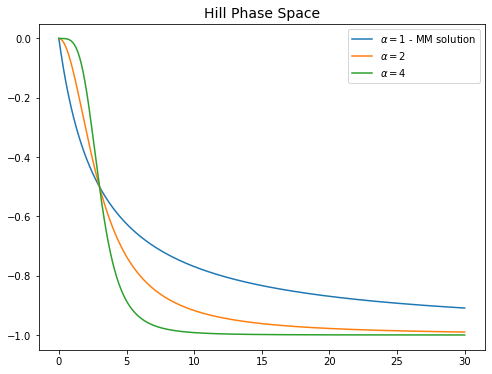

In [30]:
def hill (S : np.ndarray, vmax : float, km : float, alpha : float) -> np.ndarray:
    '''
    Hill kinetic
    
    Parameters
    ----------
        S : array-like
            Concentration of S
        
        vmax : float
            Maximum velocity of the kinetic equation
            
        km : float
            
        alpha : float
            Exponential term of the Hill equation
    '''
    return - (vmax * S**alpha) / (km**alpha + S**alpha)

# generate a range of possible S values
S = np.linspace(start=0, stop=30, num=1000)

# classical MM solution
dS_MM = hill(S, vmax=1, km=3, alpha=1)

dS_a2 = hill(S, vmax=1, km=3, alpha=2)
dS_a4 = hill(S, vmax=1, km=3, alpha=4)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(S, dS_MM, label=r'$\alpha=1$ - MM solution')
ax.plot(S, dS_a2, label=r'$\alpha=2$')
ax.plot(S, dS_a4, label=r'$\alpha=4$')
ax.set_title('Hill Phase Space', fontsize=14)
ax.legend()

We can easily notice how incrementing the $\alpha$ exponent the system requires more time to achieve the critical threshold.

## Lotka Volterra

The Lotka–Volterra equations, also known as the *predator–prey* equations, are a pair of *first-order* **nonlinear** differential equations, frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey.
The equations provides a mathematical framework for the description of **ecosystem** dynamics in which 2 species interact each other.

The equations represent a syntesis among the population dynnamic (provided by Volterra) and the theory of autocatalytic chemical reactions with oscillating creation of chemical products (provided by Lotka).
The equations describe an ideal system in which the increasing amount of "food" (prey eaten) leads to a growth of predators (reproduction).

Given $y(t)$ as the number of *predators* at time $t$ and $x(t)$ the number of *preys*, the Lotka-Volterra system of equations is:

$$
\begin{align*}
    \frac{dx}{dt} &= +\alpha x  - \beta xy \\
    \frac{dy}{dt} &= +\delta xy - \gamma y \\
\end{align*}
$$

where the sign $+$ identifies the "birth" terms (preys grows up autonomally, while predators need preys) and the negative terms ($-$) identifies the "death" terms (vice versa between predators and preys)

The $\alpha x$ term is analogous to the logistic growth: more preys and more preys birth.
The terms $\alpha$, $\beta$, $\gamma$, and $\delta$ are the **interaction terms** between the two species and they weight the growth of predator-prey populations.

The Lotka–Volterra system of equations is an example of a Kolmogorov model, which is a more general framework that can model the dynamics of ecological systems with predator–prey interactions, competition, disease, and mutualism. 

Lets try to deduce some characteristics of the model looking the form of the equations:

* The growth of predators ($y$) is strictly related to the number of preys ($x$).
    * if $y > x$ only a portion of the predators will have enough "food" for their reproduction with a consequent decrement of their number.
    * if $y < x$ the preys can increase their number since they are prevalently "safe"; however all the predators have (more than) enough "food" for their reproduction and they will tend to increase.
    This behavior leads to an **oscillating regime** of the system!
    
* The main assumption behind this model (i.e ideal factor) is the **unlimited growth** of prey population when the number of predators is 0 ($y = 0$).
    An improvement of the model can be achieved including (as for the improved Malthusian model) an extra term $-\xi x^2$ which reduce the ideality of the model.

* An analogous argumentation can be applied for the exponential decay of the predators when the preys are zero ($x = 0$).

* Further correction factors can be included considering genetic terms which model the adaptation of the species in the environment.

Starting from the implementation of the model in Python, we will try to perform a numerical analysis of the dynamic of this simple system.

As always we will use the *odeint* function of *scipy* for the numerical integration of the 2 ODEs.

In [21]:
def lotka_volterra (xy : tuple, t : np.ndarray, 
                    alpha : float, beta : float, 
                    delta : float, gamma : float) -> tuple:
    '''
    Lotka-Volterra ODE
    
    Parameters
    ----------
        xy : tuple
            List of x and y Lotka-Volterra signals
            
        t : array-like
            List of time points
        
        alpha : float
            Preys growth factor
        
        beta : float
            Preys decay factor
        
        delta : float
            Predators growth factor
        
        gamma : float
            Predators growth factor
    
    Returns
    -------
        xynew : tuple
            Next point of x and y dynamic
    '''
    
    x, y = xy
    dx = alpha * x - beta * x * y
    dy = delta * x * y - gamma * y
    return (dx, dy)

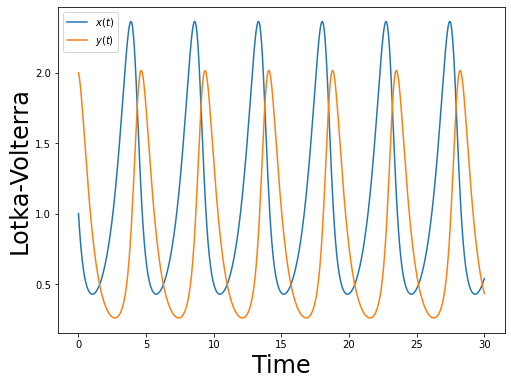

In [51]:
# initial conditions
xy0 = (1, 2) # (x0, y0)
alpha, beta, delta, gamma = (1.2, 1.4, 1.5, 1.7)

time = np.linspace(0, 30, 1000)
xy = odeint(lotka_volterra, xy0, time, 
            args=(alpha, beta, delta, gamma))
dx, dy = zip(*xy)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(time, dx, label='$x(t)$')
ax.plot(time, dy, label='$y(t)$')
ax.set_xlabel('Time', fontsize=24)
ax.set_ylabel('Lotka-Volterra', fontsize=24)
ax.legend()

Given the Lotka-Volterra system of equations, we can determine its stable points (points of *equilibrium*).
We have a stable point when the level of both the populations remains **constant**, i.e $x(t) = x^*$ and $y(t) = y^*$ for each time $t$.
As consequence, both the derivatives will be null, i.e

$$
\begin{align*}
    \alpha x^* - \beta x^* y^* &= 0 \\
    \delta x^*y^* - \gamma y^* &= 0 \\
\end{align*}
$$

This system of equation is very simple to solve, *but* unfortunately we are very lazy persons and we prefer to obtain its solution by the computer...

To this purpose we can use the *Symbolic Computation* provided by the **SymPy** library in Python.

In [74]:
from sympy import symbols
from sympy import solve

x, y = symbols('x, y')
alpha, beta, delta, gamma = symbols('alpha, beta, delta, gamma')

dx = alpha * x - beta * x * y
dy = delta * x * y - gamma * y
stable_points = solve([dx, dy], (x, y))

print('\n'.join([r'(𝑥∗, 𝑦∗) = ({}, {})'.format(*x) 
                 for x in stable_points]))

(𝑥∗, 𝑦∗) = (0, 0)
(𝑥∗, 𝑦∗) = (gamma/delta, alpha/beta)


We have found 2 points of equilibrium: the 1st ($0, 0$) is related to the extinction of both the populations; the 2nd $\left(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}\right)$ corresponds to a perfect equilibrium between preys "eaten" and preys "produced".

A second analysis can be performed studying the stability of equilibrium points.
This can be obtained studying the determinant of the Jacobian matrix associated to the system, i.e

$$
J(x, y) = \begin{bmatrix} \alpha - \beta y & -\beta x \\ \delta y & \delta x - \gamma \end{bmatrix}
$$

The matrix is obtained considering the dependecy by $x$ (first column) and $y$ (second column) of the two ODEs, independently.
Now we can substitute the equilibrium points obtained above into the matrix and compute the corresponding eigenvalues.

* 1st point: $(0, 0)$

$$
J(0, 0) = \begin{bmatrix} \alpha & 0 \\ 0 & -\gamma \end{bmatrix}
$$

* 2nd point: $\left(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}\right)$

$$
J\left(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}\right) = \begin{bmatrix} 0 & -\beta\frac{\gamma}{\delta} \\ \alpha\frac{\delta}{\beta} & 0 \end{bmatrix}
$$

For the computation of the eigenvalue solutions we can use the Symbolic Computation as performed above.

In [81]:
from sympy import symbols
from sympy import Matrix

x, y = symbols('x, y')
alpha, beta, delta, gamma = symbols('alpha, beta, delta, gamma')

J = Matrix([[alpha - beta * y, -beta * x], 
            [delta * y, delta * x - gamma]])

# substitute the 1st stable point
J_1st = J.subs([*zip([x, y], stable_points[0])])

# compute the eigenvalues
print('\n'.join(['Eigenvalue {:d}: {}'.format(i, k) 
                 for i, (k, v) in enumerate(J_1st.eigenvals().items())]))

Eigenvalue 0: alpha
Eigenvalue 1: -gamma


The two eigenvalues are always different and therefore the point of equilibrium is classified as *saddle point*, characteristic of an **unstable equilibrium**.

>⚠️**Note:** A little change in initial condition, in fact, leads to an oscillating dynamic!

Lets move to the 2nd point of equilibrium.

In [84]:
# substitute the 1st stable point
J_2nd = J.subs([*zip([x, y], stable_points[1])])

# compute the eigenvalues
print('\n'.join(['Eigenvalue {:d}: {}'.format(i, k) 
                 for i, (k, v) in enumerate(J_2nd.eigenvals().items())]))

Eigenvalue 0: -sqrt(-alpha*gamma)
Eigenvalue 1: sqrt(-alpha*gamma)


The two eigenvalues are complex (**note the minus sign under the sqrt!**) with a real component equal to zero.
This identifies a **stable equilibrium** with consequent oscillating orbits around it.

We can better appreciate the results obtained by our analysis plotting the phase space of the system under different conditions.

<IPython.core.display.Javascript object>


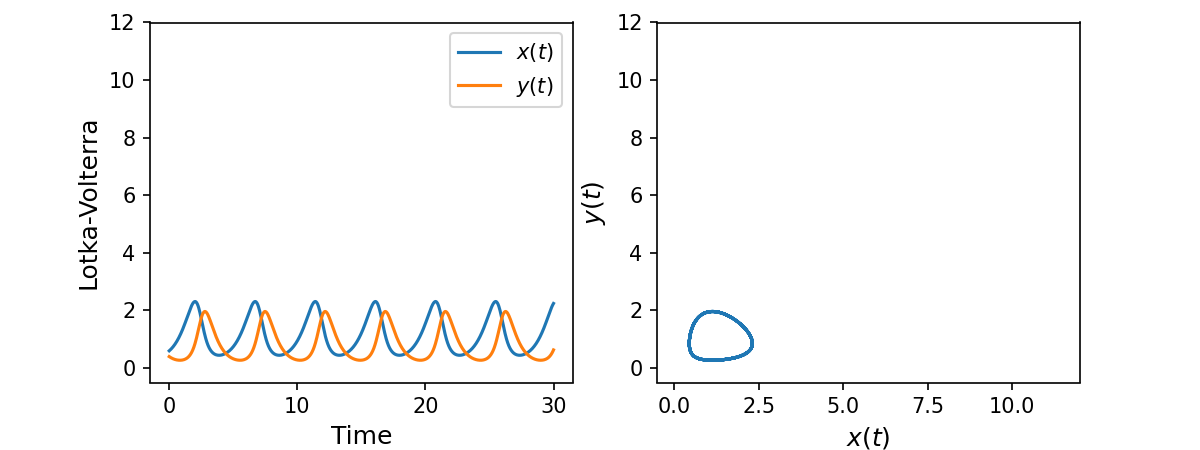

interactive(children=(FloatSlider(value=0.6, description='x0', max=1.1333333333333333, step=0.01), FloatSlider…

<function __main__.update(x0=1.0, y0=1.0)>

In [127]:
%matplotlib notebook
from ipywidgets import interact
from ipywidgets import widgets

def update (x0=1., y0=1.):
    xy0 = (x0, y0)
    xy = odeint(lotka_volterra, xy0, time, args=(alpha, beta, delta, gamma))
    dx, dy = zip(*xy)

    xyt.set_xdata(dx)
    xyt.set_ydata(dy)
    
    xt.set_ydata(dx)
    yt.set_ydata(dy)
    
    fig.canvas.draw_idle()

xy0 = (0.6, 0.4)
alpha, beta, delta, gamma = (1.2, 1.4, 1.5, 1.7)

time = np.linspace(0, 30, 1000)
xy = odeint(lotka_volterra, xy0, time, args=(alpha, beta, delta, gamma))
dx, dy = zip(*xy)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
fig.subplots_adjust(top=0.95, bottom=.15)
xt, = ax1.plot(time, dx, label='$x(t)$')
yt, = ax1.plot(time, dy, label='$y(t)$')
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Lotka-Volterra', fontsize=12)
ax1.legend(loc='upper right')
ax1.set_ylim(-.5, 12)

xyt, = ax2.plot(dx, dy)
ax2.set_xlabel('$x(t)$', fontsize=12)
ax2.set_ylabel('$y(t)$', fontsize=12)
ax2.set_xlim(-.5, 12)
ax2.set_ylim(-.5, 12)

interact(update, 
         x0=widgets.FloatSlider(min=0, max=gamma/delta, step=.01, value=xy0[0]),
         y0=widgets.FloatSlider(min=0, max=alpha/beta, step=.01, value=xy0[1])
        )

## Toggle Switch

## Population growth models

## Chemical Master Equation

In physics, chemistry and related fields, master equations are used to describe the time evolution of a system that can be modelled as being in a probabilistic combination of states at any given time and the switching between states is determined by a transition rate matrix. 

The equations are a set of differential equations – over time – of the probabilities that the system occupies each of the different states. 

In each time step the system could lies only in one of the possible **discrete** state and its transition is modeled by a statistical/probabilistical approach.

There are some cases in which the probabilistic evolution of the system is prefered, expecially in the biological field: single cell experiments does not lead to equal results, but all of them could be grouped together using probability distributions.

Particular interesting are also the systems in which the number of individuals is not large enough for a global description: in these cases the system kinetic shows too much statistical fluctuations to be modeled using the kinetic theory.

In physic the concept of *noise* is a well studied research field but in the biological field it could be difficulty interpreted (biological variability or individual variability).

For all these cases the usage of the **chemical master equation** (CME) can help us to reach a good description of the system.

The most common (mathematical) form of the CME is given by

$$
\frac{d\vec{P}}{dt} = A \vec{P}
$$

where $\vec{P}$ represents a vector of states and $A$ is the transition/connection matrix.

* When the connections between the possible states of the system are independent on time, then the MCE represents a **kinetic scheme** and we talk about a **Markov process**: in this case every jump from a state to another has an exponential probability to occur.

* When the connections between the possible states depend on time ($A_{ij} = A_{ij}(t)$) we have a **non-stationary process**.

The *stationary solution* of the CME is a *distribution of probabilities* and thus it is a function with many variables (which can help to easily fit the experimental data).

The link between the CME and the LAM is given by the limit on the reaction volume, i.e

$$
\text{CME} \quad\quad \xrightarrow[]{V\rightarrow \infty} \quad\quad LAM
$$

which corresponds to increase the number of molecules involved in the reaction.

The simplest model to simulate using CME is the **one step Poisson process**
In this model each state is characterized by a given number of molecule (different from the LAM concentration!).
In this process the number of molecule varies of just $1$ unit at time, with 2 possible values ($n + 1$ and $n - 1$).

The step from one state to the next one is determined by a **generation rate** ($g$) and a **recombination rate** ($r$), i.e

$$
n - 1 \underset{r_n}{\stackrel{g_{n-1}}{\rightleftharpoons}} n \underset{r_{n+1}}{\stackrel{g_n}{\rightleftharpoons}} n + 1
$$

Both the rates have the same meaning of kinetic constants in LAM.

From this naive scheme we can extract the **Balanced Probability Equation**, given by

$$
\frac{dp_n(t)}{dt} = g_{n-1}p_{n-1}(t) + r_{n+1}p_{n+1}(t) - r_np_n(t) - g_np_n(t)
$$

this equation is obtained considering all the possible ways to achieve the central state ($n$):

* We can achieve the state $n$ from the state $n-1$ using the $g_{n-1}$ rate multiplied by the related probability ($g_{n-1}p_{n-1}(t)$).
* We can achieve the state $n$ from the state $n+1$ using the $r_{n+1}$ rate multiplied by the related probability ($r_{n+1}p_{n+1}(t)$).
* We can leave the state $n$ and go to the state $n-1$ using the $r_{n}$ rate multiplied by the related probability ($r_np_n(t)$).
* We can leave the state $n$ and go to the state $n+1$ using the $g_{n}$ rate multiplied by the related probability ($g_np_n(t)$).

The positive terms identify the components which allow to achieve the state $n$, and vice versa for the negative ones.
Each transition is weighted by the related probability, which, in these terms, assumes the role of **flux**.
The Poisson component is given by the constrain of movements into only the first nearest neighbours of the state.

To each $n \in [0, N]$ state will be associated a differential equation and the resolution of CME will be given by the solution of the entire system.

This kind of simulation can be performed only numerically using the **Gillespie algorithm**.
An alternative is given by the analysis (and identification!) of the transition matrix $A$: the eigenvalues of $A$ must have always a null value corresponding to the *stationary distribution*.

### CME example 1 

Considering a system with only 3 states ($n=3$) and related probabilities $p_0$, $p_1$, and $p_2$.

$$
0 \underset{r_1}{\stackrel{g_0}{\rightleftharpoons}} 1 \underset{r_{2}}{\stackrel{g_1}{\rightleftharpoons}} 2
$$

In this case $p_0$ and $p_1$ determine the boundary condition of our system.
In this case

$$
\frac{dp_0}{dt} = r_1 p_1 - g_0 p_0
$$

in which $r_0 = g_{-1} = 0$ as boundary conditions.
For the state $2$ we have

$$
\frac{dp_2}{dt} = g_1 p_1 - r_2 p_2
$$

analogous to the state $0$.
And finally

$$
\begin{align*}
    \frac{dp_1}{dt} &= g_0 p_0 + r_2 p_2 - r_1 p_1 - g_1 p_1 \\
                    &= g_0 p_0 + r_2 p_2 - (r_1 + g_1)p_1
\end{align*}
$$

We can re-write this system of equations into a matrix form, given by

$$
\begin{pmatrix} 
    \frac{dp_0}{dt} \\
    \frac{dp_1}{dt} \\
    \frac{dp_2}{dt} \\
\end{pmatrix}
=
\begin{pmatrix} 
    -g_0 &     r_1    & 0    \\
     g_0 & -r_1 - g_1 & r_2  \\
     0   &     g_1    & -r_2 \\
\end{pmatrix} 
\begin{pmatrix}
    p_0 \\
    p_1 \\
    p_2 \\
\end{pmatrix}
$$

where we can easily proof that each column of matrix $A$ has a sum equal to zero (*molecular balance* condition).

The determinant of the transition matrix $A$ is given by:

$$
\begin{align*}
    \det{A} &= -g_0(-r_1 - g_1)(-r_2) - (-g_0g_1r_2 - g_0r_1r_2) \\
            &= -g_0r_1r_2 - g_0g_1r_2 + g_0g_1r_2 + g_0r_1r_2    \\
            &= 0
\end{align*}
$$

The eigenvector corresponding to the null eigenvalue is the kernel and it give us the stationary distribution of the system.

### CME example 2 - decay

A second naive example of CME application is the decay process.
This process can be easily obtain by the one step process, setting the incremental rates to $0$.

In this case the general form of the involved states will be:

$$
(n - 1) \underset{\gamma \cdot n}{\leftarrow} n \underset{\gamma \cdot (n+1)}{\leftarrow} (n + 1)
$$

where $\gamma$ is the rate of decay and it is a constant value (weighted by the number of molecula in the previous state).

The CME in this case becomes

$$
\frac{dp_n(t)}{dt} = \gamma (n+1)p_{n+1} - \gamma n p_n
$$

This equation describes the probabilistic version of the deterministic decay process (with exponential solution)

$$
N \underset{\gamma}{\rightarrow}0
$$

## Advanced application - Brusselator model

The Brusselator is a theoretical model for a type of autocatalytic reaction. 

The Brusselator model was proposed by Ilya Prigogine and his collaborators at the Université Libre de Bruxelles.
It is a portmanteau of Brussels and oscillator. 

It is characterized by the reactions 

$$
\begin{align*}
    A &\rightarrow X         \\
    B + X &\rightarrow Y + C \\
    2X + Y &\rightarrow 3X   \\
    X &\rightarrow D         \\
\end{align*}
$$

We can study the model assuming that $A$, $B$, $C$ and $D$ concentrations remain constants. 

In this way the only variables of the system are $X$ and $Y$.

The equations can be rewritten as

$$
\begin{align*}
    \frac{d[X]}{dt} &= +V_1  &\quad  \frac{d[Y]}{dt} &= 0     \\
    \frac{d[X]}{dt} &= -V_2  &\quad  \frac{d[Y]}{dt} &= +V_2  \\
    \frac{d[X]}{dt} &= +V_3  &\quad  \frac{d[Y]}{dt} &= -V_3  \\
    \frac{d[X]}{dt} &= -V_4  &\quad  \frac{d[Y]}{dt} &= 0     \\
\end{align*}
$$

Then, following the LAM and combining the previous equations we obtain

$$
\begin{align*}
    \frac{d[X]}{dt} &= [A] - [B]x + [X]^2[Y] - [X] \\
    \frac{d[Y]}{dt} &= [B]x - [X]^2[Y]             \\
\end{align*}
$$

where, for convenience, the rate constants have been set to 1. 

First of all we can study the stability points of this system of equations.

This can be achieved evaluating the derivative equation (posing their values to null)

$$
\begin{align*}
    A - Bx + x^2y - x &= 0 \\
    Bx - x^2y &= 0         \\
\end{align*}
$$

The solution of this system (very easy) lead to a single **critial point**

$$
\left(A, \frac{B}{A}\right)
$$

and inserting this point into the equations we obtained the Jacobian Matrix of the system

$$
J = \begin{bmatrix} B - 1 & A^2 \\ -B & -A^2 \end{bmatrix}
$$

from which we can evaluate the characteristic equation (aka determinant)

$$
L^2 + (1 - B + A^2) L + A^2 = 0
$$

This analysis lead to a couple of eigenvectors of the $J$ matrix which depends by the following equations

$$
1 - B + A^2 \quad\quad\quad \Delta = (1 - B + A^2)^2 - 4 A^2
$$

Now it is time to move our analysis from math-theory to Python code.

We aim to visualize the solution of the system varying the two parameters $A$ and $B$.
First of all, we have to define the equations of our system and the integration algorithm (in this example we will use a Runge-Kutta 4th, ref. [here](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)).

In [11]:
Vx = lambda x, y, A, B : A + x*x*y - B*x - x
Vy = lambda x, y, A, B : B*x - x*x*y

def RK4 (x : float, y : float, dt : float, A : float, B : float) -> tuple:
    '''
    Runge Kutta 4th step algorithm
    
    Parameters
    ----------
        x : float
            Current step of x variable
            
        y : float
            Current step of y variable
            
        dt : float
            Time interval
            
        A : float
            Brusselator constant value
            
        B : float
            Brusselator constant value
            
    Returns
    -------
        xnew, ynew : tuple
            State of (x, y) at time t+1
    '''

    kx1 = dt * Vx(x, y, A, B)
    ky1 = dt * Vy(x, y, A, B)

    kx2 = dt * Vx(x + .5 * kx1, y + .5 * ky1, A, B)
    ky2 = dt * Vy(x + .5 * kx1, y + .5 * ky1, A, B)

    kx3 = dt * Vx(x + .5 * kx2, y + .5 * ky2, A, B)
    ky3 = dt * Vy(x + .5 * kx2, y + .5 * ky2, A, B)

    kx4 = dt * Vx(x + kx3, y + ky3, A, B)
    ky4 = dt * Vy(x + kx3, y + ky3, A, B)

    x_new = x + 1. / 6. * (kx1 + 2. * kx2 + 2. * kx3 + kx4)
    y_new = y + 1. / 6. * (ky1 + 2. * ky2 + 2. * ky3 + ky4)

    return (x_new, y_new)

Now we can declare our initial conditions and move to the system integration.

In [12]:
# initial conditions
A, B = (.5, 2.)

dt = 1e-2
iterations = 10000

time = np.linspace(0, dt * iterations, iterations)
x = np.empty(shape=(iterations + 1), dtype=float)
y = np.empty(shape=(iterations + 1), dtype=float)

x[0] = 1.6
y[0] = 2.8

for i in range(0, iterations):
    x[i + 1], y[i + 1] = RK4(x[i], y[i], dt, A, B)

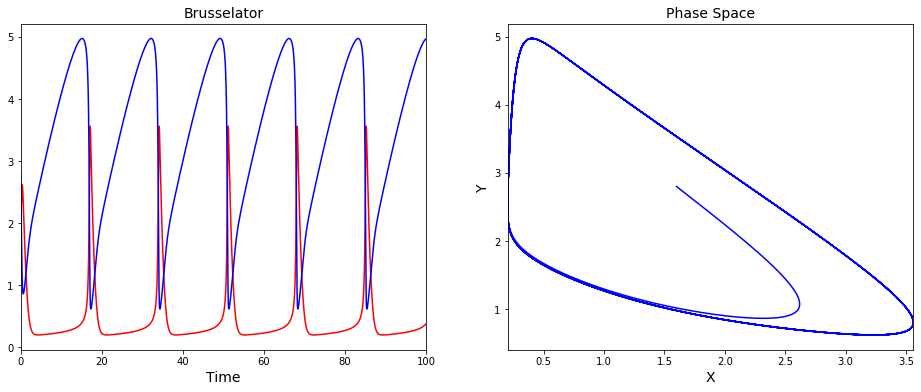

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('', fontsize=14)
ax1.set_title('Brusselator', fontsize=14)

l1, = ax1.plot(time, x[:-1], color='r', label='x')
l2, = ax1.plot(time, y[:-1], color='b', label='y')

ax2.set_xlabel('X', fontsize=14)
ax2.set_ylabel('Y', fontsize=14)
ax2.set_title('Phase Space', fontsize=14)

l3, = ax2.plot(x, y, color='b')

ax1.margins(x=0)
ax2.margins(x=0)

Now we can see how this system changes using different (and critical) parameters of $A$ and $B$.

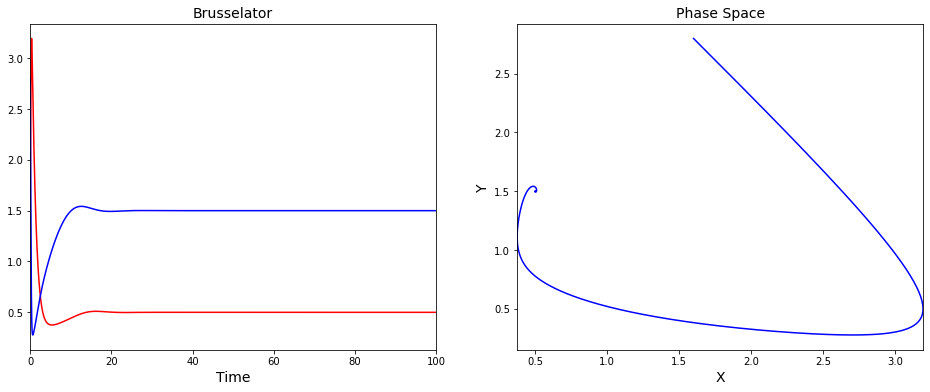

In [14]:
# 1st critical point
A = .5
B = 1 - A**2

dt = 1e-2
iterations = 10000

time = np.linspace(0, dt * iterations, iterations)
x = np.empty(shape=(iterations + 1), dtype=float)
y = np.empty(shape=(iterations + 1), dtype=float)

x[0] = 1.6
y[0] = 2.8

for i in range(0, iterations):
    x[i + 1], y[i + 1] = RK4(x[i], y[i], dt, A, B)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('', fontsize=14)
ax1.set_title('Brusselator', fontsize=14)

l1, = ax1.plot(time, x[:-1], color='r', label='x')
l2, = ax1.plot(time, y[:-1], color='b', label='y')

ax2.set_xlabel('X', fontsize=14)
ax2.set_ylabel('Y', fontsize=14)
ax2.set_title('Phase Space', fontsize=14)

l3, = ax2.plot(x, y, color='b')

ax1.margins(x=0)
ax2.margins(x=0)

## Chemical Master Equation approach

Brusselator is not a naive system for this study since it involves 2 equations *coupled* each other.
In this case we have to estimate all the possible states of our system and all the probability of transitions into a reticular structure (compared to the simpler linear one).

With a stochastic approach, considering a number of molecula about the Avogadro number we can write a CME of the Model. 
Assuming as starting point the state $n$ we have 4 possible state around that as shown in the scheme:

                            o (x-1 , y+1)

                            o (x-1, y)            o (x, y)          o (x+1 , y)

                                                                    o (x+1, y-1)
                                                                    
Each step will be correlated with a particular coefficient of ricombination (step back) and generation (step forward).
A key parameter of the Gillespie algorithm is the system dimension ($\omega$) which represents the connection between the deterministic and stochastic model.
In the CME model the $\omega$ parameter contributes in the reaction step with 2 or more molecular species.
In this case only the reaction 2 and 3 verify this conditions: in the first case we have to divide the constant reaction (= 1 in our case) for the $\omega$ value (1 specie) while in the second case there are 2 species so we divide the value for $\omega^2$.

In conclusion the CME system will be:

$$
\begin{align*}
    c_1 &= k_1 = 1 \\
    c_2 &= \frac{k_2}{\omega} = \frac{1}{\omega} \\
    c_3 &= \frac{2k_3}{\omega^2} = \frac{2}{\omega^2} \\
    c_4 &= k_4 = 1 \\
\end{align*}
$$

and combining all together the CME becomes

$$
\begin{align*}
    \frac{dP(x, y, t)}{dt} = &-(c_1A + c_2B + c_3x^2y + c_4x)P(x, y, t) \\
                             &+ c_1A P(x - 1, y, t) \\
                             &+ c_2B (x + 1) P(x + 1, y - 1, t) \\
                             &+ c_3 (x - 1)(x - 2)(y + 1) P(x - 1, y + 1, t) \\
                             &+ c_4 (x + 1) P(x + 1, y, t) \\
\end{align*}
$$

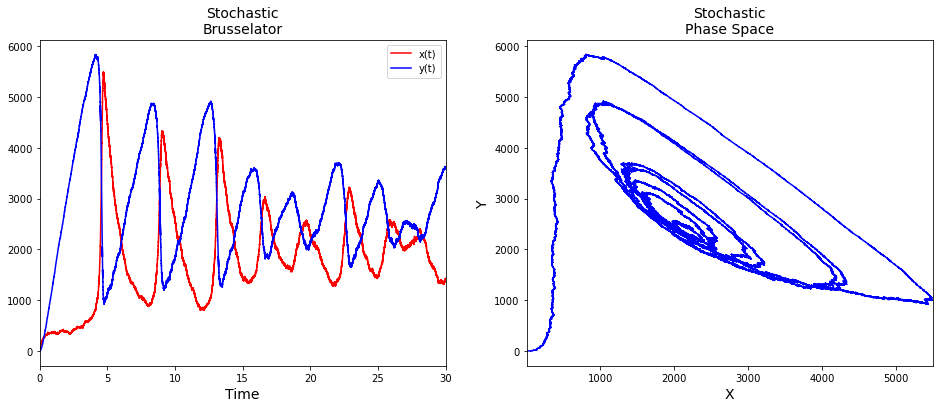

In [22]:
𝜔 = 1000.
A = 2
B = 5.2
x0, y0 = (1.6, 2.8)

ti = 0.0
tf = 30

# fix the random number generator
np.random.seed(42)

x, y, t = [x0], [y0], [ti]

while ti < tf:
    
    xi, yi = x[-1], y[-1]
    
    # define the set of reactions
    c = [A * 𝜔, 
         A * 𝜔 + B * xi,
         A * 𝜔 + B * xi + xi,
         A * 𝜔 + B * xi + xi + xi * (xi - 1) * yi / 𝜔**2,
        ]
    
    rng1, rng2 = np.random.uniform(low=0., high=1., size=(2, ))
    
    𝜏 = -np.log(rng1)/c[-1]
    uct = rng2 * c[-1]
    
    ti += 𝜏
    
    if uct < c[0]: 
        xi += 1
    elif uct < c[1]:
        xi -= 1
        yi += 1
    elif uct < c[2]:
        xi -= 1
    elif uct < c[3]:
        xi += 1
        yi -= 1
        
    x.append(xi)
    y.append(yi)
    t.append(ti)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('', fontsize=14)
ax1.set_title('Stochastic\nBrusselator', fontsize=14)

l1, = ax1.plot(t, x, color='r', label='x(t)')
l2, = ax1.plot(t, y, color='b', label='y(t)')
ax1.legend()

ax2.set_xlabel('X', fontsize=14)
ax2.set_ylabel('Y', fontsize=14)
ax2.set_title('Stochastic\nPhase Space', fontsize=14)

l3, = ax2.plot(x, y, color='b')

ax1.margins(x=0)
ax2.margins(x=0)

The obtained trajectories are noisier than the deterministic ones, and also the phase space orbits are unstable.
More realizations of the same stochastic dynamics could improve the quality of the results, as much as a tuning of the $\omega$ parameter.

#### Extra - C++ version

The C++ version of this algorithm could help us to implement multiple stochastic realizations of the dynamic evolutions with better computational performances.

The implementation will trace the Python code, with just some tricks for the visualization via OpenCV.

```c++
//g++ ChemicalMasterEquation.cpp -O3 -std=c++11 `pkg-config opencv --cflags --libs` -o CME
#include <iostream>
#include <random>
#include <opencv2/opencv.hpp>
#include <opencv2/plot.hpp>


void BrusselatorCME (std :: vector < double > & x, std :: vector < double > & y,
                     std :: vector < double > & t,
                     const double & A, const double & B,
                     const double & omega, double max_time = 30.,
                     std :: size_t seed = 123)
{
  double ti = t[0];
  double xi = x[0];
  double yi = y[0];

  std :: mt19937 mt(seed);
  std :: uniform_real_distribution < double > uniform(0., 1.);

  while (ti <= max_time)
  {
    std :: cout << "\rTime " << ti << std :: flush;

    std :: array < double, 4 > c{ {A * omega,
                                   A * omega + B * xi,
                                   A * omega + B * xi + xi,
                                   A * omega + B * xi + xi + xi * (xi - 1.) * yi / (omega * omega)
                                   }
                                 };

    const double rng1 = uniform(mt);
    const double rng2 = uniform(mt);
    const double tau = -std :: log(rng1) / c[3];
    const double uct = rng2 * c.back();

    ti += tau;

    if     (uct < c[0]) ++xi;
    else if(uct < c[1]) {--xi; ++yi;}
    else if(uct < c[2]) --xi;
    else if(uct < c[3]) {++xi; --yi;}

    x.push_back(xi);
    y.push_back(yi);
    t.push_back(ti);
  }

}

int main (int argc, char ** argv)
{
  const double A = 2.;
  const double B = 5.2;

  const double omega = 1000.;

  const double x0 = 1.6;
  const double y0 = 2.8;

  std :: vector < double > x = {x0};
  std :: vector < double > y = {y0};
  std :: vector < double > t = {0.};

  BrusselatorCME (x, y, t, A, B, omega, 30., 42);

  cv :: Mat plot_x;
  cv :: Mat plot_y;

  cv :: Ptr < cv :: plot :: Plot2d > plot = cv :: plot :: Plot2d :: create(cv :: Mat(x));
  plot->setPlotBackgroundColor( cv :: Scalar( 0, 0, 0 ) );
  plot->setPlotLineColor( cv :: Scalar( 255, 0, 0 ) );
  plot->setPlotAxisColor( cv :: Scalar( 255, 255, 255 ) );
  plot->setPlotGridColor( cv :: Scalar( 127, 127, 127 ) );
  plot->setPlotLineWidth(2);
  plot->setInvertOrientation(true);
  plot->setShowText(false);

  plot->render( plot_x );

  cv :: Mat plot_res;

  plot = cv :: plot :: Plot2d :: create(cv :: Mat(y));
  plot->setPlotAxisColor( cv :: Scalar( 255, 255, 255 ) );
  plot->setPlotLineColor( cv :: Scalar( 0, 0, 255 ) );
  plot->setPlotGridColor( cv :: Scalar( 127, 127, 127 ) );
  plot->setPlotLineWidth(2);
  plot->setInvertOrientation(true);
  plot->setShowText(false);
  plot->render( plot_y );

  plot_res = plot_x | plot_y;

  cv :: namedWindow("Brusselator CME", cv :: WINDOW_FULLSCREEN);
  cv :: moveWindow("Brusselator CME", 0, 10);
  cv :: imshow("Brusselator CME", plot_res);

  cv :: waitKey(0);

  return 0;
}

```

### Turing Pattern

One of the fundamental questions in developmental biology is how the vast range of pattern and structure we observe in nature emerges from an almost uniformly homogeneous fertilized egg. 
In particular, the mechanisms by which biological systems maintain robustness, despite being subject to numerous sources of noise, are shrouded in mystery.

The *Turing pattern* is a concept introduced by English mathematician Alan Turing in a 1952 paper titled [*The Chemical Basis of Morphogenesis*](https://www.dna.caltech.edu/courses/cs191/paperscs191/turing.pdf) which describes how patterns in nature, such as stripes and spots, can arise naturally and autonomously from a homogeneous, uniform state.
Turing examined the behaviour of a system in which two diffusible substances interact with each other, and found that such a system is able to generate a spatially periodic pattern even from a random or almost uniform initial condition.
Turing hypothesized that the resulting wavelike patterns are the chemical basis of **morphogenesis**.

Turing hypothesized that the patterns we observe during embryonic development arise in response to a spatial pre-pattern in biochemicals, which he termed morphogens. 
Cells would then respond to this pre-pattern by differentiating in a threshold-dependent way. 
Thus, Turing hypothesized that the patterns we see in nature, such as pigmentation in animals, branching in trees and skeletal structures, are reflections of inhomogeneities in underlying biochemical signalling.

To generate these pre-patterns, Turing considered the morphogens to be interacting in such a way that, in the well-mixed system, there would be a spatially uniform steady state which was stable to perturbations. 
He then proposed that, in the non-mixed system, this steady state would be driven unstable by diffusion. 
This is counterintuitive as diffusion is usually a stabilizing and a homogenizing process. 
In effect, what Turing showed was that from the interaction of two stabilizing processes, an instability could emerge. 
This is now called diffusion-driven instability (DDI) and the pattern is said to emerge or self-organize. The system Turing studied took the form

$$
\frac{\partial u}{\partial t} = D\nabla^2u + f(u)
$$

where $u$ is a vector of chemical concentrations, $D$ a matrix of constant diffusion coefficients (usually diagonal) and $f(u)$ the reaction kinetics (typically nonlinear). 
Appropriate boundary and initial conditions, which are often periodic and perturbations of the homogeneous steady state, respectively, are applied to close the system.

Turing patterns have also been produced experimentally in chemical systems, such as the *Belousov–Zhabotinsky* (BZ) reaction (ref. [here](https://en.wikipedia.org/wiki/Belousov%E2%80%93Zhabotinsky_reaction)), which has been found to be the most simple and prototypical example of pattern forming chemical reaction.
The Brusselator serves as a simple two-species model for the Belousov–Zhabotinsky reaction, a hypothetical oscillating chemical reaction system proposed by Prigogine in 1968 which is considered one of the simplest reaction–diffusion models exhibiting Turing and Hopf instabilities. 
The spatiotemporal evolution of the main variables is given by the following partial differential equations:

$$
\begin{align*}
    \frac{\partial u}{\partial t} = D_u\nabla^2 u + f(u, v) \\
    \frac{\partial v}{\partial t} = D_v\nabla^2 v + g(u, v) \\
\end{align*}
$$

where $D_u$ and $D_v$ are diffusion coefficients, $u$ and $v$ are concentrations of morphogens, $f$ and $g$ are nonlinear functions that represent the reaction kinetics, which for the Brusselator model are

$$
\begin{cases}
    f(u, v) &= A - (B + 1) u + u^2 v \\
    g(u, v) &= Bu - u^2v             \\
\end{cases}
$$

>⚠️**Note:** Note that the Turing kinetic model includes a basic assumption: the cells always live in a continuous patch environment. 
> However, this may not be the case in reality, and the motion of individuals of given cells is random and isotropic, i.e. without any preferred direction, the cells are also absolute individuals. 
> The cells or units are also absolute individuals in microscopic sense, and each isolated cell exchanges materials by diffusion with its neighbors.
> Thus, it is reasonable to consider a 1D or 2D spatially discrete reaction–diffusion system in order to explain the chemical system. 

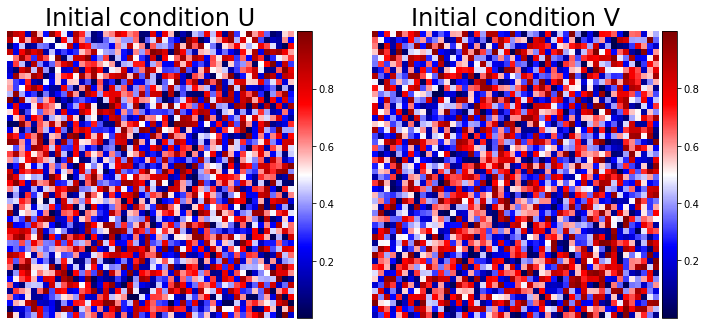

In [6]:
%matplotlib inline
import numpy as np
import pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

A, B = (4.5, 12.)
Du, Dv = (2., 12.)
dt = 0.005
sx, sy = (48, 48)

U = np.random.uniform(low=0., high=1., size=(sx, sy))
V = np.random.uniform(low=0., high=1., size=(sx, sy))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
im_U = ax1.imshow(U, cmap='seismic')
ax1.set_title('Initial condition U', fontsize=24)
ax1.axis('off')
im_V = ax2.imshow(V, cmap='seismic')
ax2.set_title('Initial condition V', fontsize=24)
ax2.axis('off')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im_U, cax=cax, orientation='vertical', shrink=0.6)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im_V, cax=cax, orientation='vertical', shrink=0.6)

<IPython.core.display.Javascript object>


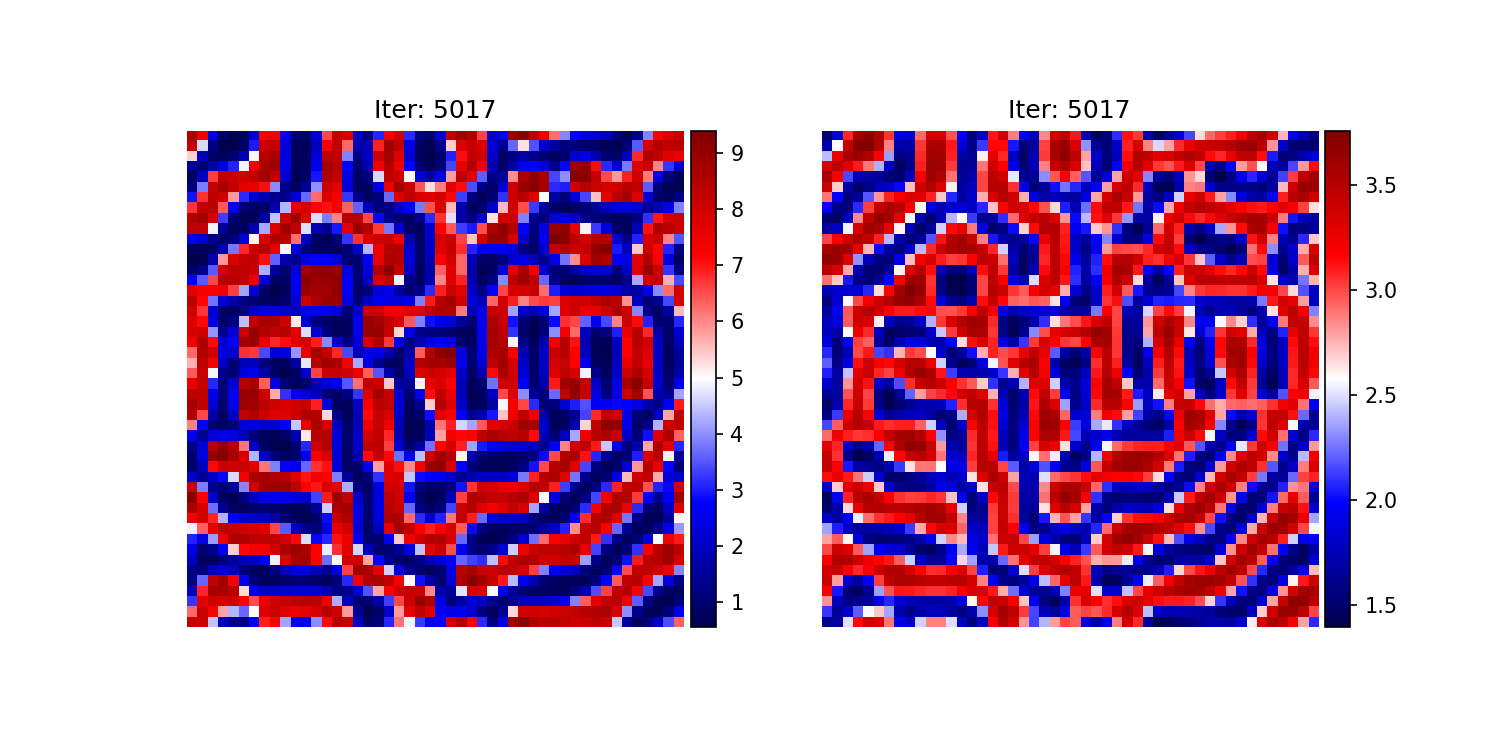

In [5]:
%matplotlib notebook
from scipy.ndimage import laplace
import matplotlib.animation

U = np.random.uniform(low=0., high=1., size=(sx, sy))
V = np.random.uniform(low=0., high=1., size=(sx, sy))

lap_u = np.empty_like(U)
lap_v = np.empty_like(V)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
im_U = ax1.imshow(U, cmap='seismic', interpolation='None', animated=True)
im_V = ax2.imshow(V, cmap='seismic', interpolation='None', animated=True)
ax1.axis('off'); ax2.axis('off')

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im_U, cax=cax1, orientation='vertical', shrink=0.6)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im_V, cax=cax2, orientation='vertical', shrink=0.6)

def brusselator_diffusion (frame_index):
        
    laplace(input=U, output=lap_u, mode='wrap')
    laplace(input=V, output=lap_v, mode='wrap')
    
    uuv = U * U * V
    
    ut = dt * (Du * lap_u + (A - (B + 1.) * U + uuv)) + U
    vt = dt * (Dv * lap_v + (B * U - uuv)) + V
    
    U[:] = ut
    V[:] = vt
    
    im_U.set_data(ut)
    im_V.set_data(vt)
    
    im_U.set_clim(ut.min(), ut.max())
    im_V.set_clim(vt.min(), vt.max())
    
    ax1.set_title('Iter: {:d}'.format(frame_index))
    ax2.set_title('Iter: {:d}'.format(frame_index))
    
    
    return (im_U, im_V),

ani = matplotlib.animation.FuncAnimation(fig, brusselator_diffusion, interval=1, frames=10000, blit=True)

### C++ version

This kind of simulations can be very expensive in terms of computational time and an efficient version of the algorithm is often mandatory for an appropriated analysis of the model.
We would stress that in the above simulation we have used a $48\times48$ space-grid, while for larger simulation the computational time could increase exponentially.

A C++ version of the same code is proposed in the next section.
For the visualization and an efficient implementation of the laplacian computation (one of the most expensive step of the code above) we use the [OpenCV](https://github.com/opencv/opencv/) library.

```c++
//g++ brusselator.cpp -O3 -std=c++11 `pkg-config opencv --cflags --libs` -o brusselator -lpthread
#include <iostream>
#include <thread>
#include <opencv2/opencv.hpp>

/**
* @brief OpenCV viewer
*
* @details This function is used for the visualization of
* an OpenCV image and it could be used for an asynchronous
* visualization of the result.
*
* @note The input image is normalized between its Min-Max
* and converted to uint8_t before the visualization.
* A Jet colormap (do not tell to prof. Giampieri that I have
* used a Jet colormap, please!) is used for the color remapping.
*
* @param name Window name
* @param img OpenCV Mat to plot
* @param ms Wait time in ms
*
*/
void view (const std :: string & name, cv :: Mat & img, int32_t ms=1)
{
  cv :: Mat temp = img.clone();
  cv :: normalize(img, temp, 0, 255, cv :: NORM_MINMAX);
  temp.convertTo(temp, CV_8UC1 );

  cv :: applyColorMap(temp, temp, cv::COLORMAP_JET);
  cv :: imshow(name, temp);
  int c = cv :: waitKey(ms);
  c = (c != -1) ? c % 256 : c;

  if (c == 27)
  {
    cv :: destroyAllWindows();

    if (ms == 0)
      return;

    //std :: cout << std :: endl;
    std :: exit(0);
  }
}

/**
* @brief Brusselator diffusion model
*
* @note The visualization of the 1st morphogen
* is performed asynchronously during the update
* computation using std :: thread.
*
* @param U OpenCV Mat of the 1st morphogen
* @param V OpenCV Mat of the 2nd morphogen
* @param dt Interval of time
* @param A Kinetic reaction constant
* @param B Kinetic reaction constant
* @param Du Diffusion coef of the 1st morphogen
* @param Dv Diffusion coef of the 2nd morphogen
* @param iteration Number of iterations to perform
*
*/
void diffusion (cv :: Mat & U, cv :: Mat & V,
                const double & dt,
                const double & A, const double & B,
                const double & Du, const double & Dv,
                const int64_t & iteration)
{

  const std :: string name = "Turing Pattern";
  cv :: namedWindow(name, cv :: WINDOW_FULLSCREEN );


  for (int64_t t = 0; t < iteration; ++t)
  {
    std :: thread display = std :: thread(view, name, std :: ref(U), 1);

    cv :: Mat lap_u;
    cv :: Mat lap_v;

    // a wrap boundary condition should be more appropriated
    // but unfortunately OpenCV Laplacian doesn't support it :(
    cv :: Laplacian(U, lap_u, CV_64FC1, 1, 1, 0, cv :: BORDER_REFLECT_101);
    cv :: Laplacian(V, lap_v, CV_64FC1, 1, 1, 0, cv :: BORDER_REFLECT_101);

    cv :: Mat uuv = U.mul(U.mul(V));

    cv :: Mat Ut = dt * (Du * lap_u + (A - (B + 1.) * U + uuv)) + U;
    cv :: Mat Vt = dt * (Dv * lap_v + (B * U - uuv)) + V;

    U = Ut.clone();
    V = Vt.clone();

    //std :: cout << "\rTime: " << dt * t << std :: flush;
    cv :: setWindowTitle(name, name + " (Time: " + std :: to_string(dt * t) + ")");
    display.join();
  }
  //std :: cout << "\rTime: " << dt * iteration << std :: endl;
}


/**
* @brief Command line helper
*
* @details Utility function for the command line user.
*
* @param argv Array of command line arguments.
*
*/
void usage (char ** argv)
{
  std :: cerr << "Usage: " << argv[0] << " [A <double>] [B <double>] [Dx <double>] [Dy <double>] [dt <double>]"
              << std :: endl
              << "Default parameters:" << std :: endl
              << "\tA = 4.5" << std :: endl
              << "\tB = 4.75" << std :: endl
              << "\tDx = 2.0" << std :: endl
              << "\tDy = 16.0" << std :: endl
              << "\tdt = 0.005" << std :: endl
              << std :: endl;
  std :: exit(1);
}



/**
* @brief Command line parser
*
* @details Parse the command line arguments
* and (eventually) set default values of the
* required variables.
* If something goes wrong the helper function
* is called.
*
* @param argc Number of arguments in command line.
* @param argv Array of command line arguments.
* @param A Kinetic reaction constant
* @param B Kinetic reaction constant
* @param Dx Diffusion coef of the 1st morphogen
* @param Dy Diffusion coef of the 2nd morphogen
* @param dt Interval of time
*
*/
void parse_args (int32_t argc, char ** argv,
                 double & A, double & B, double & Dx, double & Dy,
                 double & dt)
{
  switch (argc)
  {
    default: usage(argv);

    case 1:
    break;

    case 2:
    {
      A = std :: stod(argv[1]);
    } break;
    case 3:
    {
      B = std :: stod(argv[2]);
      parse_args(2, argv, A, B, Dx, Dy, dt);
    } break;
    case 4:
    {
      Dx = std :: stod(argv[3]);
      parse_args(3, argv, A, B, Dx, Dy, dt);
    } break;
    case 5:
    {
      Dy = std :: stod(argv[4]);
      parse_args(4, argv, A, B, Dx, Dy, dt);
    } break;
    case 6:
    {
      dt = std :: stod(argv[5]);
      parse_args(5, argv, A, B, Dx, Dy, dt);
    } break;
  }
}


int main (int argc, char ** argv)
{
  const int64_t dim = 512;

  double A = 4.5;
  double B = 4.5;
  double Du = 2.;
  double Dv = 16.;
  double dt = .005;

  parse_args(argc, argv, A, B, Du, Dv, dt);

  cv :: Mat U(dim, dim, CV_64FC1);
  cv :: Mat V(dim, dim, CV_64FC1);

  cv :: randu(U, cv :: Scalar(0.), cv :: Scalar(1.));
  cv :: randu(V, cv :: Scalar(0.), cv :: Scalar(1.));

  U = A + .3 * U;
  V = B/A + .3 * V;

  view("Initial condition", U, 0);

  diffusion(U, V, dt, A, B, Du, Dv, 6000);

  return 0;
}

```